# Prediksi Harga Rumah

Ewako 5 : 
1. Reyhan Devara
2. Desty Nurul Anitsa
3. Diva Hana Shabira
4. Putri Ardianti
5. Nabila Rasya Putri Amani
6. Ryana Purwaningrum

Program ini adalah program model AI untuk memprediksi harga rumah. Dimana model ini nantinya akan di implementasikan dengan flask agar dapat dilakukan prediksi pada web interface.

## Modules dan Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import joblib

import warnings
warnings.simplefilter('ignore')

## Import Data

In [2]:
df = pd.read_excel("DATA RUMAH.xlsx")
df.shape

(1010, 8)

## Preprocessing Data

In [3]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [4]:
df = df.drop(['NO','NAMA RUMAH'],axis=1)

In [5]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [6]:
df = df.dropna(axis=0)
df.describe()

,HARGA,LB,LT,KT,KM,GRS
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


In [7]:
df.isna().sum()

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HARGA   1010 non-null   int64
 1   LB      1010 non-null   int64
 2   LT      1010 non-null   int64
 3   KT      1010 non-null   int64
 4   KM      1010 non-null   int64
 5   GRS     1010 non-null   int64
dtypes: int64(6)
memory usage: 47.5 KB


In [9]:
df.duplicated().sum()

43

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

## Korelasi Data

In [12]:
df.corr().style.background_gradient().set_precision(2)

,HARGA,LB,LT,KT,KM,GRS
HARGA,1.00,0.75,0.81,0.33,0.41,0.48
LB,0.75,1.00,0.74,0.45,0.53,0.49
LT,0.81,0.74,1.00,0.43,0.39,0.48
KT,0.33,0.45,0.43,1.00,0.67,0.29
KM,0.41,0.53,0.39,0.67,1.00,0.34
GRS,0.48,0.49,0.48,0.29,0.34,1.00


## Training Model

In [13]:
X = df.drop(["HARGA"],axis = 1)
y = df["HARGA"]

In [14]:
X

,LB,LT,KT,KM,GRS
0,220,220,3,3,0
1,180,137,4,3,2
2,267,250,4,4,4
3,40,25,2,2,0
4,400,355,6,5,3
...,...,...,...,...,...
1004,100,140,3,2,1
1005,450,550,10,10,3
1006,160,140,4,3,2
1008,360,606,7,4,0


In [15]:
y

0        3800000000
1        4600000000
2        3000000000
3         430000000
4        9000000000
           ...     
1004     2600000000
1005     9000000000
1006     4000000000
1008    19000000000
1009    10500000000
Name: HARGA, Length: 967, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [17]:
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    tmp = model.predict(X_test)
    tmp = mean_squared_error(tmp, y_test)
    test_mse.append(tmp)
  
  return test_mse

Text(0.5, 1.0, 'Elbow Curve for Test')

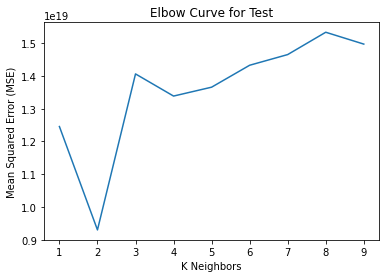

In [18]:
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

In [19]:
model= KNeighborsRegressor(2)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluasi Model

In [20]:
accuracy_train_KNN = model.score(X_train, y_train)
accuracy_test_KNN  = model.score(X_test, y_test)

In [21]:
print(f"Akurasi Model KNN (Train) : {np.round(accuracy_train_KNN * 100,2)} %")
print(f"Akurasi Model KNN (Test)  : {np.round(accuracy_test_KNN * 100,2)} %")
print("MSE",mean_squared_error(y_test,y_pred))
print("R Score",r2_score(y_test, y_pred))

Akurasi Model KNN (Train) : 88.23 %
Akurasi Model KNN (Test)  : 83.42 %
MSE 9.29855178629034e+18
R Score 0.8342411981115888


## Menyimpan Model

In [53]:
joblib.dump((model), "harga_rumah_knnregressor_fiks.model")

['harga_rumah_knnregressor_fiks.model']

In [54]:
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


## Prediksi

In [55]:
data_harga_rumah = np.array([[135, 650, 5, 3, 1]])
pred = model.predict(data_harga_rumah)
pred

array([3.14999997e+10])